In [1]:
%config IPCompleter.greedy=True
%matplotlib notebook
import libs.lib as lib
lib.setup_logger('info', logfile='/home/adebahr/apercal/ipython-notebooks/commissioning/08/18012680_NGC315.log')
import apercal

/home/apercal/pipeline/local/lib/python2.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa
root - INFO : Logging started!
root - INFO : To see the log in a bash window use the following command:
root - INFO : tail -n +1 -f /home/adebahr/apercal/ipython-notebooks/commissioning/08/18012680_NGC315.log


Setup logger with lib.setup_logger()


In [2]:
prepare = apercal.prepare('/home/adebahr/apercal/ipython-notebooks/commissioning/08/18012680_NGC315.cfg')
prepare.go()

PREPARE - INFO : ### Configuration file /home/adebahr/apercal/ipython-notebooks/commissioning/08/18012680_NGC315.cfg successfully read! ###
PREPARE - INFO : ########## Preparing data for calibration ##########
PREPARE - INFO : ### Flux calibrator dataset found. Copying beam 00 to working directory. ###
PREPARE - WARNING : ### No polarisation calibrator dataset specified. The next steps might not work! ###
PREPARE - INFO : ### 37 different beams for target field found. ###
PREPARE - INFO : ### Copying all target datasets to their working directories. ###


KeyboardInterrupt: 

In [3]:
preflag = apercal.preflag('/home/adebahr/apercal/ipython-notebooks/commissioning/08/18012680_NGC315.cfg')
# Total number of channels
nchannel = 11008

# Make lists of the channels which are affected
a = range(0, nchannel, 64) # the subband edges
b = range(1, nchannel, 64)
c = range(63, nchannel, 64)
d = range(16, nchannel, 64) # the two ghosts
e = range(48, nchannel, 64)
# Combine the channel list into one list and convert to a string
l = a + b + c + d + e
preflag.preflag_manualflag_channel = ';'.join(str(ch) for ch in l)
preflag.manualflag()

In [4]:
preflag.aoflagger_bandpass()

TypeError: a float is required

In [2]:
preflag = apercal.preflag('/home/adebahr/apercal/ipython-notebooks/commissioning/08/18012680_NGC315.cfg')
preflag.aoflagger_flag()

In [3]:
convert = apercal.convert('/home/adebahr/apercal/ipython-notebooks/commissioning/08/18012680_NGC315.cfg')
convert.go()

CONVERT - INFO : ### Configuration file /home/adebahr/apercal/ipython-notebooks/commissioning/08/18012680_NGC315.cfg successfully read! ###
CONVERT - INFO : ########## FILE CONVERSION started ##########
CONVERT - INFO : ### Starting conversion from MS to UVFITS format ###
CONVERT - INFO : ### Converted MS file 3C196.MS to UVFITS format! ###
CONVERT - INFO : ### Converted MS file /data/adebahr/apertif/18012680_NGC315/00/raw/NGC315.MS to UVFITS format! ###
CONVERT - INFO : # Creating directory /data/adebahr/apertif/18012680_NGC315/06/crosscal #
CONVERT - INFO : ### Converted MS file /data/adebahr/apertif/18012680_NGC315/06/raw/NGC315.MS to UVFITS format! ###
CONVERT - INFO : ### Conversion from MS to UVFITS format done! ###
CONVERT - INFO : ### Starting conversion from UVFITS to MIRIAD format ###
CONVERT - INFO : ### Converted UVFITS file 3C196.MS to MIRIAD format! ###
CONVERT - INFO : ### Converted UVFITS file /data/adebahr/apertif/18012680_NGC315/00/crosscal/NGC315.UVFITS to MIRIAD for

In [4]:
ccal = apercal.ccal('/home/adebahr/apercal/ipython-notebooks/commissioning/08/18012680_NGC315.cfg')
ccal.go()

CROSSCAL - INFO : ### Configuration file /home/adebahr/apercal/ipython-notebooks/commissioning/08/18012680_NGC315.cfg successfully read! ###
CROSSCAL - INFO : ########## Starting CROSS CALIBRATION ##########
CROSSCAL - INFO : ### Bandpass calibration on the flux calibrator data started ###
CROSSCAL - INFO : ### Bandpass calibration on the flux calibrator data done ###
CROSSCAL - INFO : ### No polarisation calibration done! ###
CROSSCAL - INFO : ### Copying calibrator solutions to target dataset ###
CROSSCAL - INFO : # Copying calibrator solutions (bandpass, gains) from flux calibrator #
CROSSCAL - INFO : # Polarisation calibration solutions (leakage, angle) not found #
CROSSCAL - INFO : # Copying calibrator solutions to 2 beams! #
CROSSCAL - INFO : # Calibrator solutions copied to beam 00! #
CROSSCAL - INFO : # Calibrator solutions copied to beam 01! #
CROSSCAL - INFO : ### All solutions copied to target data set(s) ###
CROSSCAL - INFO : ########## CROSS CALIBRATION done ##########


CROSSCAL - INFO : ### Configuration file /home/adebahr/apercal/ipython-notebooks/commissioning/08/18012680_NGC315.cfg successfully read! ###
/home/apercal/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


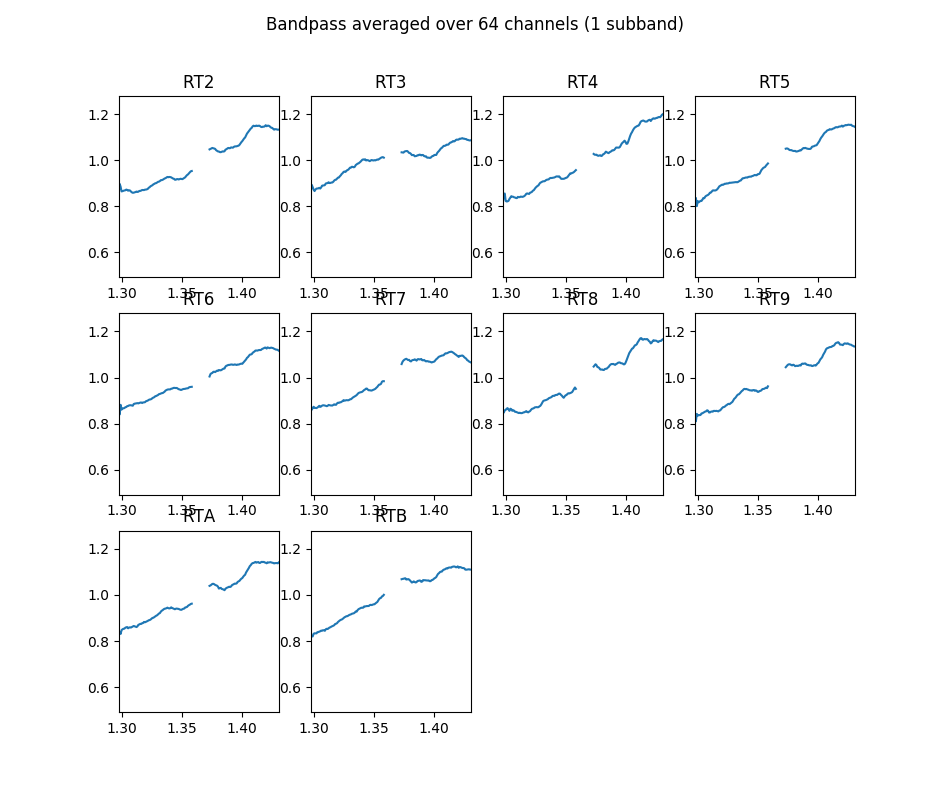

In [2]:
ccal = apercal.ccal('/home/adebahr/apercal/ipython-notebooks/commissioning/08/18012680_NGC315.cfg')
import subs.readmirlog
values, freqs = subs.readmirlog.get_bp(ccal.crosscaldir + '/' + ccal.fluxcal)
from matplotlib import pyplot as plt
import numpy as np

# Available telescopes
tnames = ['RT2','RT3','RT4','RT5','RT6','RT7','RT8','RT9','RTA','RTB']

values[values==0] = np.nan # Replace all zeros with nan
avvalues = values.reshape(values.shape[0],-1, 64,values.shape[2]) # Reshape the second axis of the array
avmean = np.nanmean(avvalues, axis=2) # Calculate the mean over the new axis
avfreqs = np.nanmean(freqs.reshape(-1,64), axis=1) # Adjust the size of the freqeucny axis to the new shape

plt.figure(figsize=(9.5,8))
plt.xlim(np.min(freqs),np.max(freqs)) # Limit the plot to the minimum and maximum frequencies
plt.suptitle('Bandpass averaged over 64 channels (1 subband)', fontsize='large')

for a in range(len(avvalues[:])):
    plt.subplot(np.ceil(len(tnames)/4.0), 4, a+1)
    plt.plot(avfreqs, avmean[a,:,:])
    plt.title(tnames[a])
    plt.xlim(np.min(avfreqs),np.max(avfreqs)) # Limit the plot to the minimum and maximum frequencies
    plt.ylim(np.nanmin(avvalues), np.nanmax(avvalues))
    plt.show()

In [2]:
scal = apercal.scal('/home/adebahr/apercal/ipython-notebooks/commissioning/08/18012680_NGC315.cfg')
# First calibrate the central beam
scal.beam = '00'
scal.go()

SELFCAL - INFO : ### Configuration file /home/adebahr/apercal/ipython-notebooks/commissioning/08/18012680_NGC315.cfg successfully read! ###
SELFCAL - INFO : ########## Starting SELF CALIBRATION ##########
SELFCAL - INFO : # Creating directory /data/adebahr/apertif/18012680_NGC315/00/selfcal #
SELFCAL - INFO : # Moved to directory /data/adebahr/apertif/18012680_NGC315/00/selfcal #
SELFCAL - INFO : ### Splitting of target data into individual frequency chunks started ###
SELFCAL - INFO : # Applying calibrator solutions to target data before averaging #
SELFCAL - INFO : # Calibrator solutions to target data applied #
SELFCAL - INFO : # Found 1 subband(s) in target data #
SELFCAL - INFO : # Started splitting of subband 0 #
SELFCAL - INFO : # Adjusting chunk size to 0.016796875 GHz for regular gridding of the data chunks over frequency #
SELFCAL - INFO : # Starting splitting of data chunk 0 for subband 0 #
SELFCAL - INFO : # Increasing frequency bin of data chunk 0 to keep bandwidth of chun

root - INFO : ### Field seems to have a flux of 2.0675383128448783 Jy ###
root - INFO : ### Found 5 source(s) in the model at a cutoff of 80.0 percent with a total flux of 1.6762937670883706 Jy ###
root - INFO : ### Wrote source textfile to /data/adebahr/apertif/18012680_NGC315/00/selfcal/01/pm/model.txt! ###
SELFCAL - INFO : # Creating model from textfile model.txt for chunk 01 #
SELFCAL - INFO : # Doing parametric self-calibration on chunk 01 with solution interval 5 min and uvrange limits of 0.5~1000 klambda #
SELFCAL - INFO : # Parametric self calibration routine on chunk 01 done! #
SELFCAL - INFO : # Starting parametric self calibration routine on chunk 02 #
SELFCAL - INFO : # Moved to directory /data/adebahr/apertif/18012680_NGC315/00/selfcal/02 #
SELFCAL - INFO : # Creating directory /data/adebahr/apertif/18012680_NGC315/00/selfcal/02/pm #
root - INFO : ### Found 36 source(s) with no counterparts. Setting their spectral index to -0.7 ###
root - INFO : ### Found 12 source(s) with

SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 00 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/0 set to 0.16471714774767557 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.16471714774767557 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/0 was set to 0.032943429549535115 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.18916625 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0027152363 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 00 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 00 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/1 set to 0.3

SELFCAL - INFO : # Mask threshold for major/minor cycle 1/4 set to 0.01009941816329956 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.01009941816329956 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/4 was set to 0.002019883632659912 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/4 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.009318623 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00088656787 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 00 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=3 minutes for major cycle 01 #
SELFCAL - INFO : # Major self-calibration cycle 1 for frequency chunk 00 finished #
SELFCAL - INFO : # Major self-c

SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 01 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/2 set to 0.07844440937042237 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.07844440937042237 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/2 was set to 0.015688881874084473 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.05844944 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.001489216 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 01 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 01 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/3 set to 0.03

SELFCAL - INFO : # Major/minor cycle 2/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.009257788 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00074586866 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 01 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 01 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/1 set to 0.009561637429630055 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.009561637429630055 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/1 was set to 0.001912327485926011 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/1 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/1 created #
SELFCAL - INFO : # Resi

SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 02 finished #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 02 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/4 set to 0.019465047121047973 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.019465047121047973 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/4 was set to 0.0038930094242095948 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/4 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.015607479 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0010148489 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 02 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3

SELFCAL - INFO : # Clean threshold at major/minor cycle 2/2 was set to 0.001611793327331543 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.008157162 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00068169826 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 02 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 02 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/3 set to 0.006447173309326172 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.006447173309326172 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/3 was set to 0.0012894346618652344 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/3 clean

SELFCAL - INFO : # Mask threshold set by Noise threshold #
SELFCAL - INFO : # Mask from last minor iteration of last major cycle copied #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/0 was set to 0.005024616718292236 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.012238644 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0010210171 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 03 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 03 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/1 set to 0.018916204115923714 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.018916204115923714 Jy/beam created #
SELFCAL - IN

SELFCAL - INFO : # Mask with threshold 0.005098975300788879 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/4 was set to 0.0010197950601577759 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/4 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.005135499 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00069770415 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 03 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=0.5 minutes for major cycle 02 #
SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 03 finished #
SELFCAL - INFO : # Standard self-calibration routine for chunk 03 finished #
SELFCAL - INFO : # Starting standard self-calibration routine on frequency chunk 04 #
SELFCAL - INFO : # Moved to 

SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.016334644317626955 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/2 was set to 0.003266928863525391 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.01421205 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0010886197 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 04 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 04 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/3 set to 0.013067715454101562 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.013067715454101562 Jy/beam created #
SELFCA

SELFCAL - INFO : # Mask threshold for major/minor cycle 0/0 set to 0.16393867135047913 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.16393867135047913 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/0 was set to 0.03278773427009583 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.1838836 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0026199694 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 05 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 05 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/1 set to 0.31476224899291994 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range thr

SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.010004094839096069 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/4 was set to 0.002000818967819214 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/4 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.008791206 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00082016125 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 05 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=3 minutes for major cycle 01 #
SELFCAL - INFO : # Major self-calibration cycle 1 for frequency chunk 05 finished #
SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 05 started #
SELFCAL - INFO : # Creating directory /data/

SELFCAL - INFO : # Mask threshold for major/minor cycle 0/2 set to 0.0790455150604248 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0790455150604248 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/2 was set to 0.01580910301208496 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.058939304 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0014093185 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 06 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 06 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/3 set to 0.035131340026855466 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range th

SELFCAL - INFO : # Residual image for major/minor cycle 2/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.009681349 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0006260519 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 06 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 06 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/1 set to 0.009587732202866498 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.009587732202866498 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/1 was set to 0.0019175464405732996 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/1 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/1 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/1 created #
SELFCAL - INFO : # Peak of the residual image is 0.0100387465 Jy/beam #
SELFCAL

SELFCAL - INFO : # Mask threshold for major/minor cycle 0/4 set to 0.0197835111618042 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0197835111618042 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/4 was set to 0.00395670223236084 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/4 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.015712317 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0009518066 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 07 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=5 minutes for major cycle 00 #
SELFCAL - INFO : # Major self-calibration cycle 0 for frequency chunk 07 finished #
SELFCAL - INFO : # Major self-calib

SELFCAL - INFO : # Residual image for major/minor cycle 2/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.009026469 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0005867384 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 07 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 07 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/3 set to 0.006515524291992187 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.006515524291992187 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/3 was set to 0.0013031048583984374 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/3 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/3 created #
SELFCAL - INFO : # Peak of the residual image is 0.0071452726 Jy/beam #
SELFCAL

SELFCAL - INFO : ### Configuration file /home/adebahr/apercal/ipython-notebooks/commissioning/08/18012680_NGC315.cfg successfully read! ###


<IPython.core.display.Javascript object>


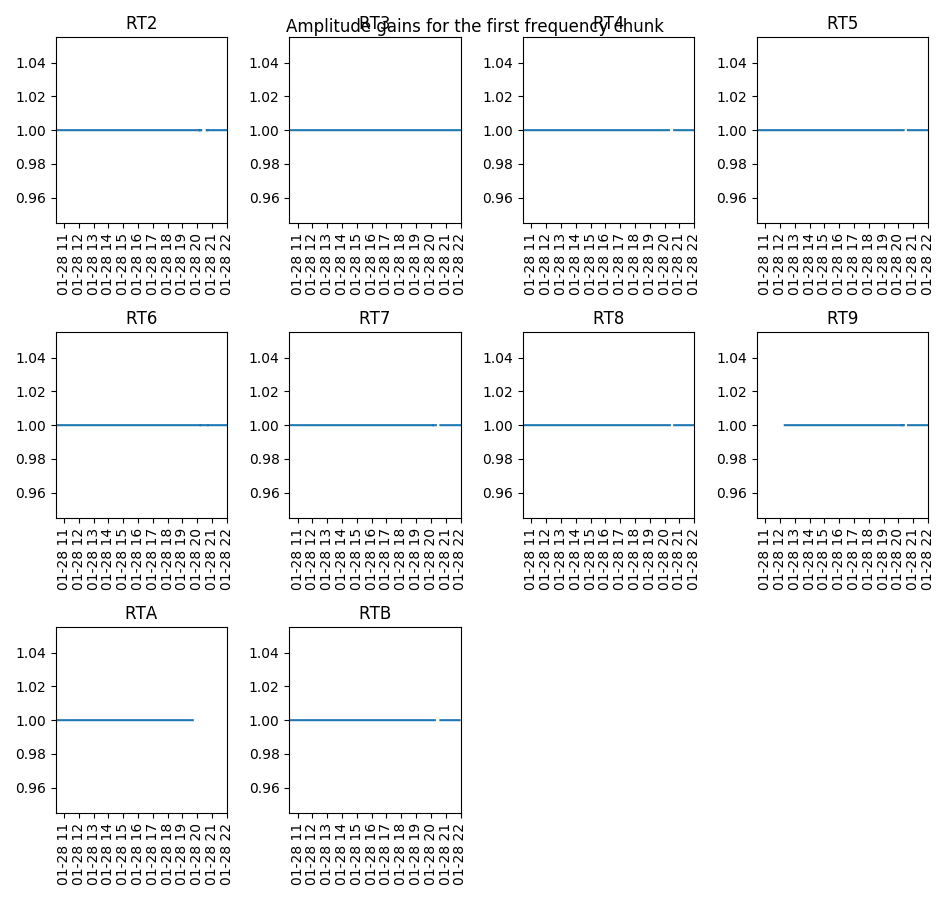

In [3]:
scal = apercal.scal('/home/adebahr/apercal/ipython-notebooks/commissioning/08/18012680_NGC315.cfg')
scal.beam = '00'

import subs.readmirlog
import datetime
import glob
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

files = glob.glob(scal.selfcaldir + '/*/*.mir')
gains, times = subs.readmirlog.get_gains(files[0])

# Available telescopes
tnames = ['RT2','RT3','RT4','RT5','RT6','RT7','RT8','RT9','RTA','RTB']

# Replace all zeros with nan (non-existant solutions)
gains[gains==0] = np.nan

plt.figure(figsize=(9.5,9))
plt.suptitle('Amplitude gains for the first frequency chunk', fontsize='large')

for a in range(gains.shape[0]):
    plt.subplot(np.ceil(len(tnames)/4.0), 4, a+1)
    plt.plot(times,gains[a,:,0])
    plt.title(tnames[a])
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.xlim(times[0],times[-1])
    plt.show()

<IPython.core.display.Javascript object>


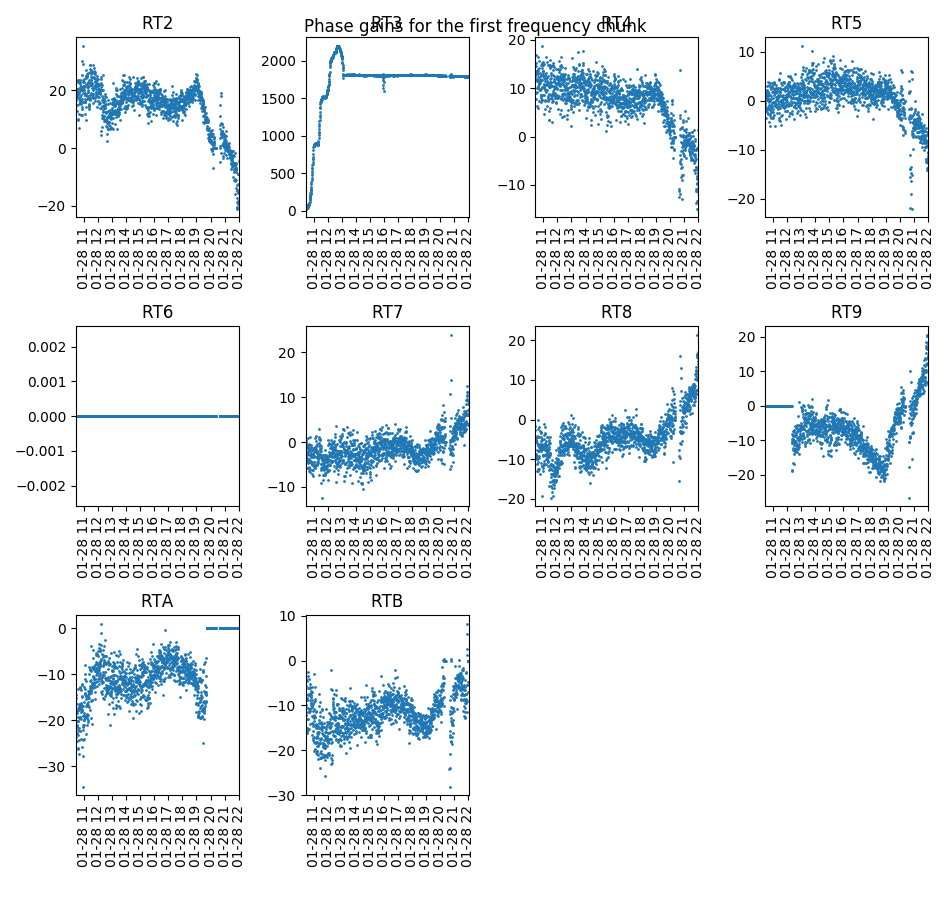

In [4]:
# Plot the phases by changing plt.plot(times,gains[a,:,0]) to plt.plot(times,gains[a,:,1])

plt.figure(figsize=(9.5,9))
plt.suptitle('Phase gains for the first frequency chunk', fontsize='large')

gains, times = subs.readmirlog.get_gains(files[0])

for a in range(gains.shape[0]):
    plt.subplot(np.ceil(len(tnames)/4.0), 4, a+1)
    plt.scatter(times,gains[a,:,1],s=1)
    plt.title(tnames[a])
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.xlim(times[0],times[-1])
    plt.show()

<IPython.core.display.Javascript object>


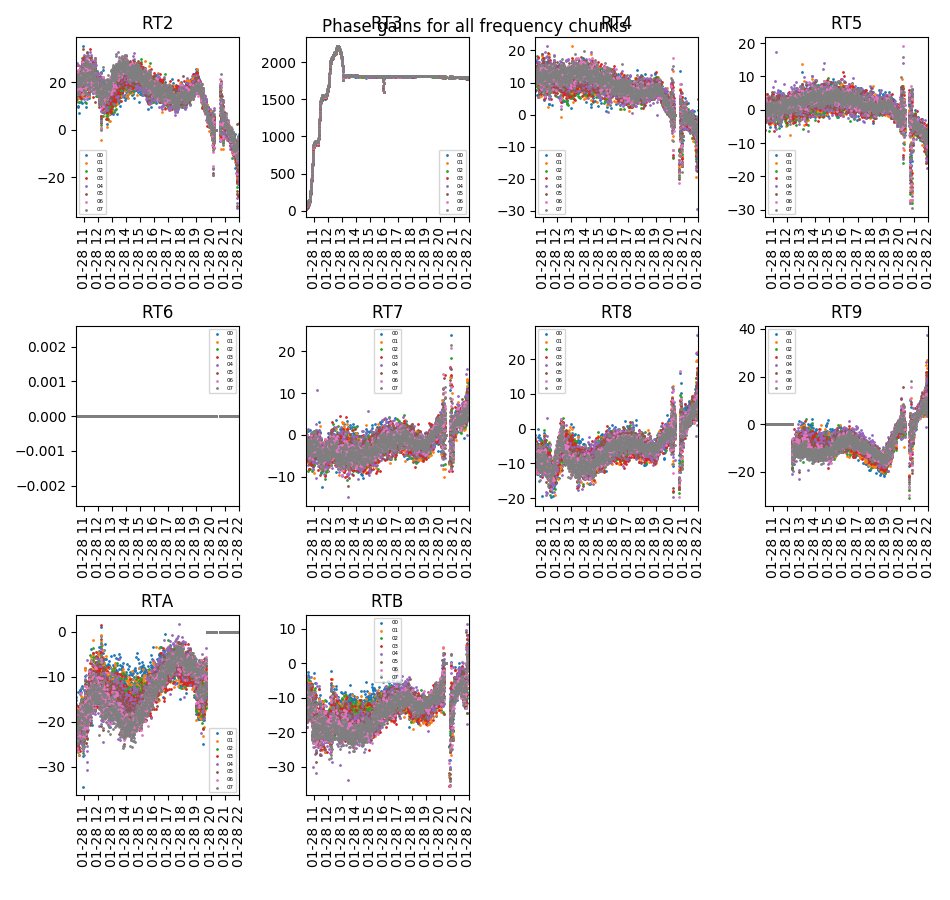

In [5]:
# Plot the phases of all frequency chunks in one plot

plt.figure(figsize=(9.5,9))
plt.suptitle('Phase gains for all frequency chunks', fontsize='large')

gainslist = []
timeslist = []

for dataset in files: # Create lists from the gain tables
    gains, times = subs.readmirlog.get_gains(dataset)
    gainslist.append(gains)
    timeslist.append(times)
    
for a in range(gains.shape[0]):
    plt.subplot(np.ceil(len(tnames)/4.0), 4, a+1)
    for n,g in enumerate(gainslist): # Iterate over the different frequency chunks
        plt.scatter(timeslist[n],gainslist[n][a,:,1],s=1, label=str(n).zfill(2))
    plt.title(tnames[a])
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.xlim(times[0],times[-1])
    plt.legend(fontsize=4)
    plt.show()

In [71]:
scal.beam = '06'
scal.go()

SELFCAL - WARNING : ### Deleting all self-calibrated data. ###
SELFCAL - INFO : # Moved to directory /data/adebahr/apertif/18012680_NGC315/06/selfcal #
SELFCAL - INFO : ########## Starting SELF CALIBRATION ##########
SELFCAL - INFO : ### Splitting of target data into individual frequency chunks started ###
SELFCAL - INFO : # Applying calibrator solutions to target data before averaging #
SELFCAL - INFO : # Calibrator solutions to target data applied #
SELFCAL - INFO : # Found 1 subband(s) in target data #
SELFCAL - INFO : # Started splitting of subband 0 #
SELFCAL - INFO : # Adjusting chunk size to 0.016796875 GHz for regular gridding of the data chunks over frequency #
SELFCAL - INFO : # Starting splitting of data chunk 0 for subband 0 #
SELFCAL - INFO : # Increasing frequency bin of data chunk 0 to keep bandwidth of chunks equal over the whole bandwidth #
SELFCAL - INFO : # New frequency bin is 0.0010498046875 GHz #
SELFCAL - INFO : # Creating directory /data/adebahr/apertif/18012680

root - INFO : ### Found 17 source(s) in the model at a cutoff of 80.0 percent with a total flux of 0.1774189767090318 Jy ###
root - INFO : ### Wrote source textfile to /data/adebahr/apertif/18012680_NGC315/06/selfcal/01/pm/model.txt! ###
SELFCAL - INFO : # Creating model from textfile model.txt for chunk 01 #
SELFCAL - INFO : # Doing parametric self-calibration on chunk 01 with solution interval 5 min and uvrange limits of 0.5~1000 klambda #
SELFCAL - INFO : # Parametric self calibration routine on chunk 01 done! #
SELFCAL - INFO : # Starting parametric self calibration routine on chunk 02 #
SELFCAL - INFO : # Moved to directory /data/adebahr/apertif/18012680_NGC315/06/selfcal/02 #
SELFCAL - INFO : # Creating directory /data/adebahr/apertif/18012680_NGC315/06/selfcal/02/pm #
root - INFO : ### Found 35 source(s) with no counterparts. Setting their spectral index to -0.7 ###
root - INFO : ### Found 10 source(s) with 1 counterpart(s) ###
root - INFO : ### Using standard WSRT beam for calc

SELFCAL - INFO : # Mask threshold for major/minor cycle 0/0 set to 0.01096161330739657 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.01096161330739657 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/0 was set to 0.002192322661479314 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.010002233 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0005194501 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 00 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 00 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/1 set to 0.021046297550201418 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range

SELFCAL - INFO : # Clean threshold at major/minor cycle 1/4 was set to 0.000396 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/4 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.0019798633 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00047268995 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 00 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=3 minutes for major cycle 01 #
SELFCAL - INFO : # Major self-calibration cycle 1 for frequency chunk 00 finished #
SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 00 started #
SELFCAL - INFO : # Creating directory /data/adebahr/apertif/18012680_NGC315/06/selfcal/00/02 #
SELFCAL - INFO : # The minor cycle dynamic range limits for major cycle 2 are [50.0, 53.125, 62.5, 78.125

SELFCAL - INFO : # Clean threshold at major/minor cycle 0/2 was set to 0.001044399380683899 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.0043334425 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00046809347 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 01 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 01 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/3 set to 0.0023208875126308863 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0023208875126308863 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/3 was set to 0.00046417750252617727 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/3 c

SELFCAL - INFO : # Mask threshold for major/minor cycle 2/1 set to 0.00198 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Theoretical noise threshold #
SELFCAL - INFO : # Mask with threshold 0.00198 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/1 was set to 0.000396 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/1 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/1 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/1 created #
SELFCAL - INFO : # Peak of the residual image is 0.0019530919 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.000442865 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 01 finished #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 01 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/2 set to 0.00198 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Theoretical noise threshold #
SELFCAL - INFO : # Mask with

SELFCAL - INFO : # Peak of the residual image is 0.0019111052 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00042333812 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 02 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=5 minutes for major cycle 00 #
SELFCAL - INFO : # Major self-calibration cycle 0 for frequency chunk 02 finished #
SELFCAL - INFO : # Major self-calibration cycle 1 for frequency chunk 02 started #
SELFCAL - INFO : # Creating directory /data/adebahr/apertif/18012680_NGC315/06/selfcal/02/01 #
SELFCAL - INFO : # The minor cycle dynamic range limits for major cycle 1 are [25.0, 26.5625, 31.25, 39.0625, 50.0] #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 02 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/0 set to 0.00198 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Theoretical noise threshold #
SELFCAL - INFO : # Mask from last 

SELFCAL - INFO : # Cleaned image for major/minor cycle 2/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/3 created #
SELFCAL - INFO : # Peak of the residual image is 0.0019489402 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00041584772 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 02 finished #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 02 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/4 set to 0.00198 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Theoretical noise threshold #
SELFCAL - INFO : # Mask with threshold 0.00198 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/4 was set to 0.000396 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/4 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Peak of the residual ima

SELFCAL - INFO : # Major/minor cycle 1/1 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/1 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/1 created #
SELFCAL - INFO : # Peak of the residual image is 0.0019816821 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00048599203 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 03 finished #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 03 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/2 set to 0.00198 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Theoretical noise threshold #
SELFCAL - INFO : # Mask with threshold 0.00198 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/2 was set to 0.000396 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 

SELFCAL - INFO : # Major self-calibration cycle 0 for frequency chunk 04 started #
SELFCAL - INFO : # Creating directory /data/adebahr/apertif/18012680_NGC315/06/selfcal/04/00 #
SELFCAL - INFO : # The minor cycle dynamic range limits for major cycle 0 are [3.0, 1.5625, 6.25, 14.0625, 25.0] #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 04 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/0 set to 0.011527681102355322 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.011527681102355322 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/0 was set to 0.0023055362204710645 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.011021834 Jy/beam #
SELFCAL - I

SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 04 finished #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 04 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/4 set to 0.00198 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Theoretical noise threshold #
SELFCAL - INFO : # Mask with threshold 0.00198 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/4 was set to 0.000396 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/4 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.0020453515 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0005071282 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 04 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=3 minutes f

SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 05 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/2 set to 0.005526369214057922 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.005526369214057922 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/2 was set to 0.0011052738428115843 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.0045083174 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00036766776 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 05 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 05 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/3 set 

SELFCAL - INFO : # Peak of the residual image is 0.0018674397 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00033684832 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 05 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 05 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/1 set to 0.00198 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Theoretical noise threshold #
SELFCAL - INFO : # Mask with threshold 0.00198 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/1 was set to 0.000396 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/1 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/1 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/1 created #
SELFCAL - INFO : # Peak of the residual image is 0.0018799569 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00033679602 Jy/beam #
SELFCAL - INFO : # Minor self-calibrat

SELFCAL - INFO : # Mask with threshold 0.00198 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/4 was set to 0.000396 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/4 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.002041032 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.000304174 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 06 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=5 minutes for major cycle 00 #
SELFCAL - INFO : # Major self-calibration cycle 0 for frequency chunk 06 finished #
SELFCAL - INFO : # Major self-calibration cycle 1 for frequency chunk 06 started #
SELFCAL - INFO : # Creating directory /data/adebahr/apertif/18012680_NGC315/06/selfcal/06/01 #
SELFCAL - INFO : # The minor cycle dynamic 

SELFCAL - INFO : # Mask threshold for major/minor cycle 2/3 set to 0.00198 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Theoretical noise threshold #
SELFCAL - INFO : # Mask with threshold 0.00198 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/3 was set to 0.000396 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/3 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/3 created #
SELFCAL - INFO : # Peak of the residual image is 0.0019495393 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00029398792 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 06 finished #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 06 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/4 set to 0.00198 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Theoretical noise threshold #
SELFCAL - INFO : # Mask wi

SELFCAL - INFO : # Mask threshold for major/minor cycle 1/1 set to 0.00198 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Theoretical noise threshold #
SELFCAL - INFO : # Mask with threshold 0.00198 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/1 was set to 0.000396 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/1 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/1 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/1 created #
SELFCAL - INFO : # Peak of the residual image is 0.0019443671 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0002875013 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 07 finished #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 07 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/2 set to 0.00198 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Theoretical noise threshold #
SELFCAL - INFO : # Mask wit

SELFCAL - INFO : ### Configuration file /home/adebahr/apercal/ipython-notebooks/commissioning/08/18012680_NGC315.cfg successfully read! ###


<IPython.core.display.Javascript object>


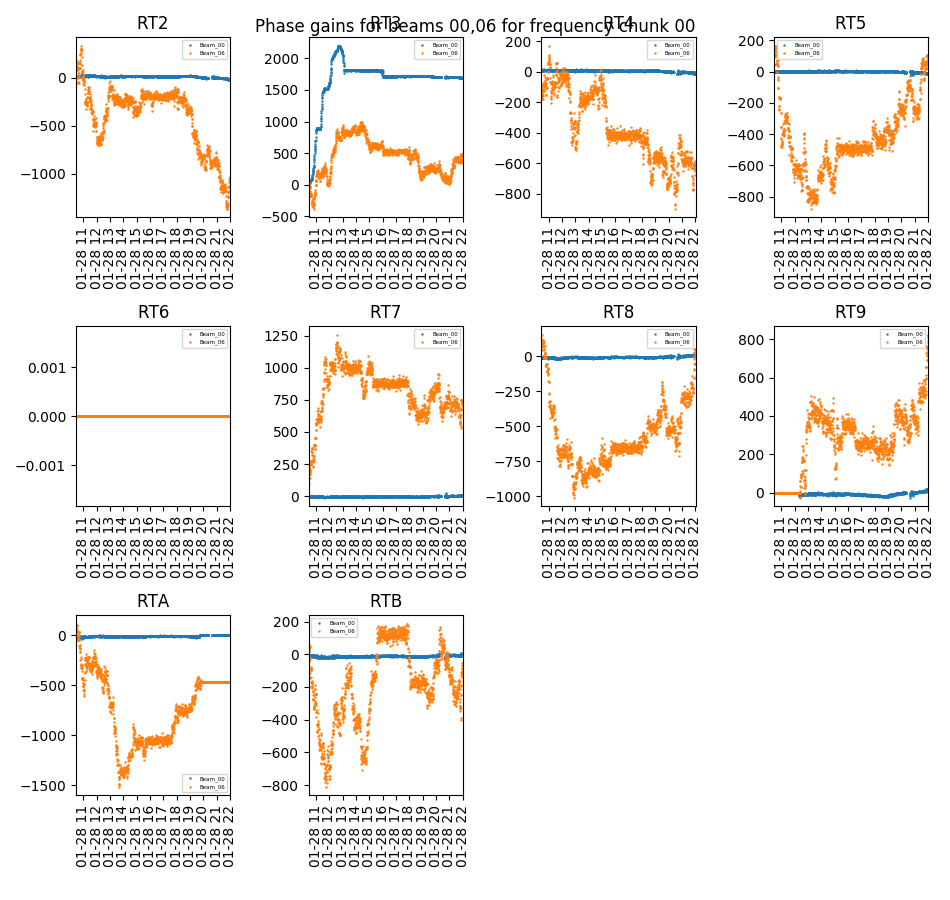

In [2]:
# Plot the phase gains for beam 00 and beam 06 for chunk 00 in one plot

scal = apercal.scal('/home/adebahr/apercal/ipython-notebooks/commissioning/08/18012680_NGC315.cfg')
import subs

chunk = '00'
beams = ['00','06']
tnames = ['RT2','RT3','RT4','RT5','RT6','RT7','RT8','RT9','RTA','RTB']

gains_beams = []
times_beams = []

for beam in beams:
    scal.beam = beam
    subs.setinit.setinitdirs(scal) # Don't forget to initialise the directory structure after changing the beam. For modules this is done automatically.
    files = glob.glob(scal.selfcaldir + '/*/*.mir')
    gains, times = subs.readmirlog.get_gains(files[int(chunk)]) # Gains for the beams
    gains_beams.append(gains)
    times_beams.append(times)
    
plt.figure(figsize=(9.5,9))
plt.suptitle('Phase gains for beams 00,06 for frequency chunk ' + chunk, fontsize='large')

for a in range(gains.shape[0]):
    plt.subplot(np.ceil(len(tnames)/4.0), 4, a+1)
    for n, b in enumerate(times_beams):
        plt.scatter(times_beams[n], gains_beams[n][a,:,1], s=0.5, label='Beam_' + beams[n])
    plt.title(tnames[a])
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.xlim(times[0],times[-1])
    plt.legend(fontsize=4)
    plt.show()